In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/codebasics/py/master/ML/13_kmeans/income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


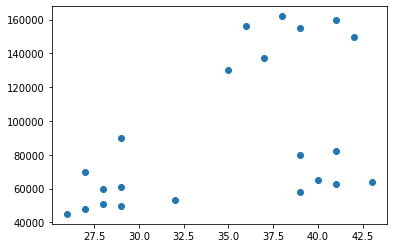

In [3]:
plt.scatter(df['Age'], df['Income($)'])

In [4]:
km = KMeans(n_clusters=3)
print(km)

KMeans(n_clusters=3)


In [5]:
y_predicted=km.fit_predict(df[['Age', 'Income($)']])
print(y_predicted)

[0 0 2 2 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 0 0 2]


In [6]:
df['cluster'] = y_predicted
df.head(10)

,Name,Age,Income($),cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1
5,Gautam,39,155000,1
6,David,41,160000,1
7,Andrea,38,162000,1
8,Brad,36,156000,1
9,Angelina,35,130000,1


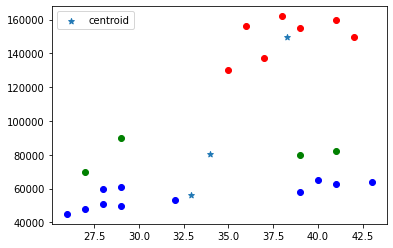

In [7]:
df0 = df[df['cluster']==0]
#df0.head()
df1 = df[df['cluster']==1]
df2 = df[df['cluster']==2]
plt.scatter(df0['Age'], df0['Income($)'], color='green')
plt.scatter(df1['Age'], df1['Income($)'], color='red')
plt.scatter(df2['Age'], df2['Income($)'], color='blue')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], marker='*', label= 'centroid')
plt.legend()

In [36]:
scaler=MinMaxScaler()
#rs=df['Income($)''].reshape(-1,1)
df['Income($)']=scaler.fit_transform(df[['Income($)']])
df['Age']=scaler.fit_transform(df[['Age']])
df.head()


,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


In [41]:
km = KMeans(n_clusters=3)
y_predicted=km.fit_predict(df[['Age', 'Income($)']])
print(y_predicted)

[1 1 1 1 2 2 2 2 2 2 2 1 1 1 1 1 0 0 0 0 0 0]


In [42]:
df['cluster'] = y_predicted
df.head(10)

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,2
5,Gautam,0.764706,0.940171,2
6,David,0.882353,0.982906,2
7,Andrea,0.705882,1.000000,2
8,Brad,0.588235,0.948718,2
9,Angelina,0.529412,0.726496,2


In [43]:
df0 = df[df['cluster']==0]
df0.head()

,Name,Age,Income($),cluster
16,Dipika,0.823529,0.170940,0
17,Priyanka,0.882353,0.153846,0
18,Nick,1.000000,0.162393,0
19,Alia,0.764706,0.299145,0
20,Sid,0.882353,0.316239,0


In [44]:
df1 = df[df['cluster']==1]
df2 = df[df['cluster']==2]

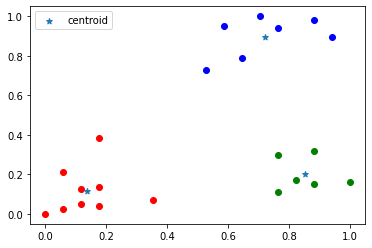

In [50]:
plt.scatter(df0['Age'], df0['Income($)'], color='green')
plt.scatter(df1['Age'], df1['Income($)'], color='red')
plt.scatter(df2['Age'], df2['Income($)'], color='blue')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], marker='*', label= 'centroid')
plt.legend()

In [46]:
print(km.cluster_centers_)

[[0.85294118 0.2022792 ]
 [0.1372549  0.11633428]
 [0.72268908 0.8974359 ]]


In [51]:
k_range=range(1,10)
sse=[]
for k in k_range:
  km=KMeans(n_clusters=k)
  km.fit(df[['Age', 'Income($)']])
  sse.append(km.inertia_)

In [52]:
print(sse)

[5.434011511988176, 2.091136388699076, 0.4750783498553094, 0.34910470944195643, 0.2664030124668415, 0.2105547899547249, 0.16869711728567788, 0.13265419827245162, 0.10188787724979426]


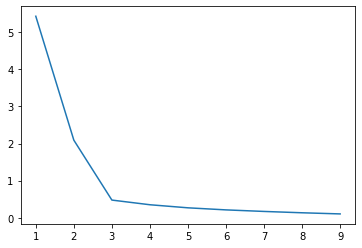

In [53]:
plt.plot(k_range,sse)

In [2]:
from sklearn.datasets import load_iris

In [12]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [13]:
df['flower'] = iris.target
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flower
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [14]:
df.drop(['sepal length (cm)', 'sepal width (cm)', 'flower'],axis='columns',inplace=True)

In [15]:
km = KMeans(n_clusters=3)
yp = km.fit_predict(df)

In [16]:
df['cluster'] = yp
df.head(2)

,petal length (cm),petal width (cm),cluster
0,1.4,0.2,1
1,1.4,0.2,1


In [17]:
df.cluster.unique()

array([1, 2, 0], dtype=int32)

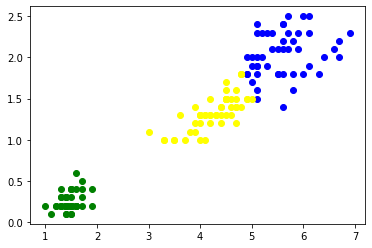

In [18]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='blue')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color='green')
plt.scatter(df3['petal length (cm)'],df3['petal width (cm)'],color='yellow')

In [19]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df)
    sse.append(km.inertia_)

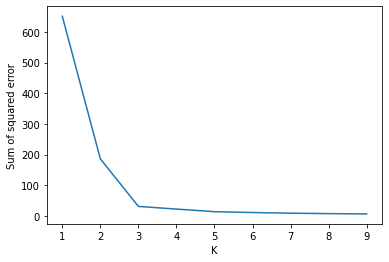

In [20]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)